# Check outputs

inputFiles/SnowMIP/FR-Cdp_spinup/job_options_file.txt

- 1995 to 2013 
- metLoop = 10
- spinfast = 2

Annual outputs only

In [13]:
# Env: phd_v3
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowMIP/FR-Cdp_spinup'

In [16]:
!ls {path}

actlyr_annually.nc	    ftablemax_annually.nc      npp_annually.nc
actlyrmax_annually.nc	    ftablemin_annually.nc      pr_annually.nc
actlyrmin_annually.nc	    fVegLitter_annually.nc     ra_annually.nc
albs_annually.nc	    gpp_annually.nc	       rh_annually.nc
cLand_annually.nc	    hfls_annually.nc	       rls_annually.nc
cLeaf_annually.nc	    hfss_annually.nc	       rmrveg_annually.nc
cRoot_annually.nc	    lai_annually.nc	       rss_annually.nc
cSoil_annually.nc	    landCoverFrac_annually.nc  sftlf.nc
cStem_annually.nc	    mrro_annually.nc	       tas_annually.nc
cVeg_annually.nc	    mrsfl_annually.nc	       tran_annually.nc
evspsbl_annually.nc	    mrsll_annually.nc	       vcmax0_annually.nc
fProductDecomp_annually.nc  nbp_annually.nc	       vegHeight_annually.nc
ftable_annually.nc	    nep_annually.nc


As we generally start the C pools, etc. from zero it takes several runs to spin up sites. Especially the high-latitude sites tend to be slower to spin up. To check whether the model is spun up, we usually look at the outputs for NBP, soil C, etc. to see whether they’re relatively stable or close to zero for NBP averaged over several years. An easy check is to look at the ratio of NEP/NPP. We usually say that a site is spun up, if the absolute value of NEP/NPP is less than 0.02.

In [38]:
freq = 'annually'

tas = xr.open_dataset(path+'/tas_'+freq+'.nc').tas
# snd = xr.open_dataset(path+'/snd_'+freq+'.nc').snd
# snw = xr.open_dataset(path+'/snw_'+freq+'.nc').snw
nbp = xr.open_dataset(path+'/nbp_'+freq+'.nc').nbp # net mass flux of carbon from atmosphere into land
nep = xr.open_dataset(path+'/nep_'+freq+'.nc').nep # Natural flux of CO2 atm -> land
npp = xr.open_dataset(path+'/npp_'+freq+'.nc').npp # Carbon Mass Flux out of Atmosphere due to Net Primary Production
cSoil = xr.open_dataset(path+'/cSoil_'+freq+'.nc').cSoil # Carbon mass in the full depth of the soil model
vegHeight = xr.open_dataset(path+'/vegHeight_'+freq+'.nc').vegHeight

tas

<xarray.DataArray 'tas' (time: 190, lat: 1, lon: 1)>
array([[[278.917831]],

       [[278.535706]],

       [[280.086119]],

       [[279.187765]],

       [[279.257932]],

       [[279.680513]],

       [[279.171106]],

       [[279.738833]],

       [[280.18143 ]],

       [[279.034342]],

       [[278.703243]],

       [[279.959553]],

       [[279.386403]],

       [[279.027795]],

       [[279.786077]],

       [[278.251195]],

       [[280.500795]],

       [[279.625175]],

       [[278.898739]],

       [[278.917831]],

       [[278.535706]],

       [[280.086119]],

       [[279.187765]],

       [[279.257932]],

       [[279.680513]],

       [[279.171106]],

       [[279.738833]],

       [[280.18143 ]],

       [[279.034342]],

       [[278.703243]],

       [[279.959553]],

       [[279.386403]],

       [[279.027795]],

       [[279.786077]],

       [[278.251195]],

       [[280.500795]],

       [[279.625175]],

       [[278.898739]],

       [[278.917831]],

       [[278.535706]],

       [[280.086119]],

       [[279.187765]],

       [[279.257932]],

       [[279.680513]],

       [[279.171106]],

       [[279.738833]],

       [[280.18143 ]],

       [[279.034342]],

       [[278.703243]],

       [[279.959553]],

       [[279.386403]],

       [[279.027795]],

       [[279.786077]],

       [[278.251195]],

       [[280.500795]],

       [[279.625175]],

       [[278.898739]],

       [[278.917831]],

       [[278.535706]],

       [[280.086119]],

       [[279.187765]],

       [[279.257932]],

       [[279.680513]],

       [[279.171106]],

       [[279.738833]],

       [[280.18143 ]],

       [[279.034342]],

       [[278.703243]],

       [[279.959553]],

       [[279.386403]],

       [[279.027795]],

       [[279.786077]],

       [[278.251195]],

       [[280.500795]],

       [[279.625175]],

       [[278.898739]],

       [[278.917831]],

       [[278.535706]],

       [[280.086119]],

       [[279.187765]],

       [[279.257932]],

       [[279.680513]],

       [[279.171106]],

       [[279.738833]],

       [[280.18143 ]],

       [[279.034342]],

       [[278.703243]],

       [[279.959553]],

       [[279.386403]],

       [[279.027795]],

       [[279.786077]],

       [[278.251195]],

       [[280.500795]],

       [[279.625175]],

       [[278.898739]],

       [[278.917831]],

       [[278.535706]],

       [[280.086119]],

       [[279.187765]],

       [[279.257932]],

       [[279.680513]],

       [[279.171106]],

       [[279.738833]],

       [[280.18143 ]],

       [[279.034342]],

       [[278.703243]],

       [[279.959553]],

       [[279.386403]],

       [[279.027795]],

       [[279.786077]],

       [[278.251195]],

       [[280.500795]],

       [[279.625175]],

       [[278.898739]],

       [[278.917831]],

       [[278.535706]],

       [[280.086119]],

       [[279.187765]],

       [[279.257932]],

       [[279.680513]],

       [[279.171106]],

       [[279.738833]],

       [[280.18143 ]],

       [[279.034342]],

       [[278.703243]],

       [[279.959553]],

       [[279.386403]],

       [[279.027795]],

       [[279.786077]],

       [[278.251195]],

       [[280.500795]],

       [[279.625175]],

       [[278.898739]],

       [[278.917831]],

       [[278.535706]],

       [[280.086119]],

       [[279.187765]],

       [[279.257932]],

       [[279.680513]],

       [[279.171106]],

       [[279.738833]],

       [[280.18143 ]],

       [[279.034342]],

       [[278.703243]],

       [[279.959553]],

       [[279.386403]],

       [[279.027795]],

       [[279.786077]],

       [[278.251195]],

       [[280.500795]],

       [[279.625175]],

       [[278.898739]],

       [[278.917831]],

       [[278.535706]],

       [[280.086119]],

       [[279.187765]],

       [[279.257932]],

       [[279.680513]],

       [[279.171106]],

       [[279.738833]],

       [[280.18143 ]],

       [[279.034342]],

       [[278.703243]],

       [[279.959553]],

       [[27

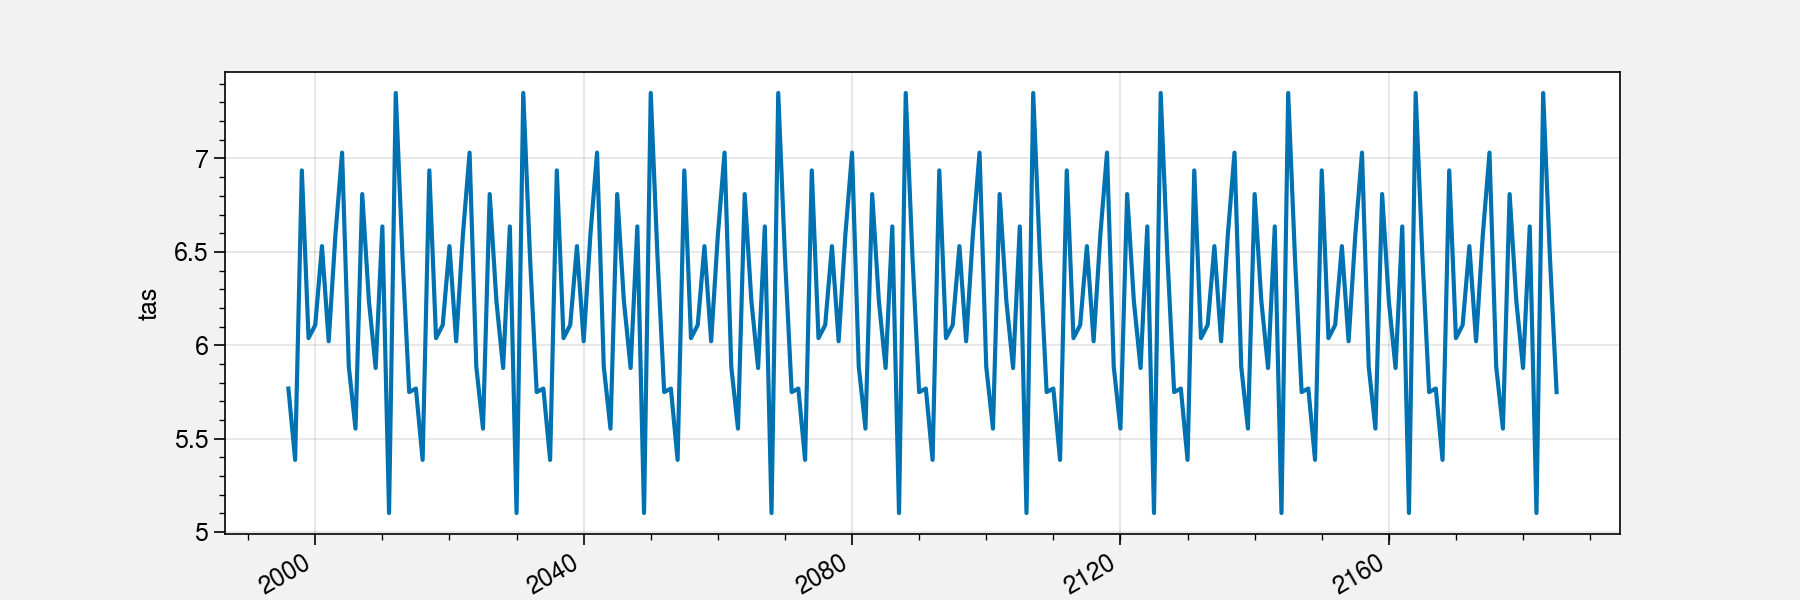

In [30]:
(tas-27315).plot(aspect=3, size=3)

In [31]:
# snd.plot()

In [32]:
# snw.plot()

## Check the carbon fluxes

In [33]:
nep

<xarray.DataArray 'nep' (time: 190, lat: 1, lon: 1)>
array([[[ 6.341225e-09]],

       [[ 1.058881e-09]],

       [[ 4.704224e-09]],

       [[ 2.623645e-09]],

       [[ 3.894157e-09]],

       [[ 3.058263e-09]],

       [[ 2.677956e-09]],

       [[ 2.505932e-09]],

       [[-4.109787e-09]],

       [[ 4.641312e-09]],

       [[ 5.303519e-09]],

       [[ 5.048666e-09]],

       [[ 1.576940e-09]],

       [[ 1.771051e-09]],

       [[ 7.108248e-09]],

       [[ 1.131526e-09]],

       [[ 6.228099e-09]],

       [[ 6.948524e-10]],

       [[ 2.431398e-09]],

       [[ 2.779098e-10]],

       [[ 1.680136e-10]],

       [[ 4.667547e-09]],

       [[ 3.284615e-09]],

       [[ 4.936134e-09]],

       [[ 4.280666e-09]],

       [[ 3.843192e-09]],

       [[ 3.405322e-09]],

       [[-3.626333e-09]],

       [[ 4.672166e-09]],

       [[ 5.127089e-09]],

       [[ 4.726030e-09]],

       [[ 1.190014e-09]],

       [[ 1.265063e-09]],

       [[ 6.503784e-09]],

       [[ 4.912870e-10]],

       [[ 5.470120e-09]],

       [[ 3.255891e-11]],

       [[ 1.762286e-09]],

       [[-3.997977e-10]],

       [[-4.587747e-10]],

       [[ 3.974477e-09]],

       [[ 2.613252e-09]],

       [[ 4.293515e-09]],

       [[ 3.580022e-09]],

       [[ 3.227683e-09]],

       [[ 2.765876e-09]],

       [[-4.355538e-09]],

       [[ 4.069754e-09]],

       [[ 4.494669e-09]],

       [[ 4.060279e-09]],

       [[ 6.085427e-10]],

       [[ 6.884821e-10]],

       [[ 5.814931e-09]],

       [[-1.179988e-10]],

       [[ 4.880112e-09]],

       [[-5.635056e-10]],

       [[ 1.208495e-09]],

       [[-9.216718e-10]],

       [[-9.766492e-10]],

       [[ 3.441414e-09]],

       [[ 2.059118e-09]],

       [[ 3.798767e-09]],

       [[ 3.097426e-09]],

       [[ 2.735723e-09]],

       [[ 2.262860e-09]],

       [[-4.906614e-09]],

       [[ 3.594870e-09]],

       [[ 4.001735e-09]],

       [[ 3.579822e-09]],

       [[ 1.431740e-10]],

       [[ 2.211787e-10]],

       [[ 5.326553e-09]],

       [[-5.739217e-10]],

       [[ 4.405565e-09]],

       [[-1.003537e-09]],

       [[ 7.901299e-10]],

       [[-1.343623e-09]],

       [[-1.390212e-09]],

       [[ 3.048317e-09]],

       [[ 1.675905e-09]],

       [[ 3.393879e-09]],

       [[ 2.708885e-09]],

       [[ 2.342742e-09]],

       [[ 1.852650e-09]],

       [[-5.345140e-09]],

       [[ 3.224863e-09]],

       [[ 3.624553e-09]],

       [[ 3.189868e-09]],

       [[-1.919967e-10]],

       [[-1.257177e-10]],

       [[ 4.953761e-09]],

       [[-9.291139e-10]],

       [[ 4.049990e-09]],

       [[-1.355507e-09]],

       [[ 4.570162e-10]],

       [[-1.655442e-09]],

       [[-1.695367e-09]],

       [[ 2.704507e-09]],

       [[ 1.365281e-09]],

       [[ 3.116486e-09]],

       [[ 2.402679e-09]],

       [[ 2.065061e-09]],

       [[ 1.587174e-09]],

       [[-5.678235e-09]],

       [[ 2.940530e-09]],

       [[ 3.331124e-09]],

       [[ 2.893320e-09]],

       [[-4.471264e-10]],

       [[-3.922630e-10]],

       [[ 4.667631e-09]],

       [[-1.198749e-09]],

       [[ 3.765997e-09]],

       [[-1.616748e-09]],

       [[ 2.031792e-10]],

       [[-1.919497e-09]],

       [[-1.920735e-09]],

       [[ 2.453343e-09]],

       [[ 1.114580e-09]],

       [[ 2.877076e-09]],

       [[ 2.166340e-09]],

       [[ 1.827877e-09]],

       [[ 1.358337e-09]],

       [[-5.934103e-09]],

       [[ 2.724582e-09]],

       [[ 3.120060e-09]],

       [[ 2.668285e-09]],

       [[-6.422458e-10]],

       [[-5.892674e-10]],

       [[ 4.442472e-09]],

       [[-1.417199e-09]],

       [[ 3.551459e-09]],

       [[-1.843619e-09]],

       [[-6.018892e-13]],

       [[-2.089742e-09]],

       [[-2.102536e-09]],

       [[ 2.280991e-09]],

       [[ 9.347499e-10]],

       [[ 2.702405e-09]],

       [[ 1.984420e-09]],

       [[ 1.669471e-09]],

       [[ 1.184014e-09]],

       [[-6.129116e-09]],

       [[ 2.564977e-09]],

       [[ 2.955217e-09]],

       [[ 2.504965e-09]],

       [[-8.199428e-10]],

     

In [34]:
npp

<xarray.DataArray 'npp' (time: 190, lat: 1, lon: 1)>
array([[[1.090639e-08]],

       [[9.724966e-09]],

       [[1.548107e-08]],

       [[1.416212e-08]],

       [[1.591765e-08]],

       [[1.532317e-08]],

       [[1.497011e-08]],

       [[1.484897e-08]],

       [[8.873589e-09]],

       [[1.526909e-08]],

       [[1.641360e-08]],

       [[1.651822e-08]],

       [[1.270424e-08]],

       [[1.253220e-08]],

       [[1.855355e-08]],

       [[1.249851e-08]],

       [[1.784460e-08]],

       [[1.226251e-08]],

       [[1.338927e-08]],

       [[1.092259e-08]],

       [[1.064983e-08]],

       [[1.524685e-08]],

       [[1.372355e-08]],

       [[1.552590e-08]],

       [[1.520136e-08]],

       [[1.501638e-08]],

       [[1.498938e-08]],

       [[8.961089e-09]],

       [[1.523426e-08]],

       [[1.638267e-08]],

       [[1.651261e-08]],

       [[1.272358e-08]],

       [[1.253387e-08]],

       [[1.857967e-08]],

       [[1.250840e-08]],

       [[1.778086e-08]],

       [[1.228088e-08]],

       [[1.339822e-08]],

       [[1.091456e-08]],

       [[1.066660e-08]],

       [[1.523977e-08]],

       [[1.371309e-08]],

       [[1.552717e-08]],

       [[1.515644e-08]],

       [[1.503635e-08]],

       [[1.499088e-08]],

       [[8.957789e-09]],

       [[1.523563e-08]],

       [[1.638660e-08]],

       [[1.649065e-08]],

       [[1.273363e-08]],

       [[1.254937e-08]],

       [[1.851002e-08]],

       [[1.250011e-08]],

       [[1.780134e-08]],

       [[1.226246e-08]],

       [[1.340265e-08]],

       [[1.092342e-08]],

       [[1.066327e-08]],

       [[1.523858e-08]],

       [[1.368066e-08]],

       [[1.553378e-08]],

       [[1.518472e-08]],

       [[1.504126e-08]],

       [[1.498916e-08]],

       [[8.973882e-09]],

       [[1.524569e-08]],

       [[1.638336e-08]],

       [[1.649326e-08]],

       [[1.273069e-08]],

       [[1.253737e-08]],

       [[1.851551e-08]],

       [[1.250556e-08]],

       [[1.779691e-08]],

       [[1.226398e-08]],

       [[1.340572e-08]],

       [[1.091945e-08]],

       [[1.065604e-08]],

       [[1.525662e-08]],

       [[1.370467e-08]],

       [[1.552036e-08]],

       [[1.518721e-08]],

       [[1.502965e-08]],

       [[1.496629e-08]],

       [[8.958087e-09]],

       [[1.523833e-08]],

       [[1.637222e-08]],

       [[1.647825e-08]],

       [[1.272962e-08]],

       [[1.253524e-08]],

       [[1.850875e-08]],

       [[1.250661e-08]],

       [[1.780694e-08]],

       [[1.225759e-08]],

       [[1.340320e-08]],

       [[1.091946e-08]],

       [[1.064638e-08]],

       [[1.522699e-08]],

       [[1.369513e-08]],

       [[1.553579e-08]],

       [[1.518384e-08]],

       [[1.503777e-08]],

       [[1.498593e-08]],

       [[8.964489e-09]],

       [[1.523624e-08]],

       [[1.637815e-08]],

       [[1.647567e-08]],

       [[1.274139e-08]],

       [[1.253677e-08]],

       [[1.851350e-08]],

       [[1.251471e-08]],

       [[1.780132e-08]],

       [[1.226524e-08]],

       [[1.340361e-08]],

       [[1.090654e-08]],

       [[1.065306e-08]],

       [[1.522108e-08]],

       [[1.368182e-08]],

       [[1.552671e-08]],

       [[1.517381e-08]],

       [[1.502162e-08]],

       [[1.498515e-08]],

       [[8.957096e-09]],

       [[1.522628e-08]],

       [[1.637923e-08]],

       [[1.647268e-08]],

       [[1.275948e-08]],

       [[1.254528e-08]],

       [[1.850482e-08]],

       [[1.250320e-08]],

       [[1.780299e-08]],

       [[1.223619e-08]],

       [[1.339823e-08]],

       [[1.091845e-08]],

       [[1.064765e-08]],

       [[1.523168e-08]],

       [[1.367632e-08]],

       [[1.552950e-08]],

       [[1.517415e-08]],

       [[1.503097e-08]],

       [[1.498270e-08]],

       [[8.958312e-09]],

       [[1.523498e-08]],

       [[1.637304e-08]],

       [[1.648566e-08]],

       [[1.273064e-08]],

       [[1.253701e-08]],

       [[1.857759e-08]],

       [[1.251054e-08]],

       [[1.779282e-08]],

       [[1.227056e-08]],

       [[1.339707e-08

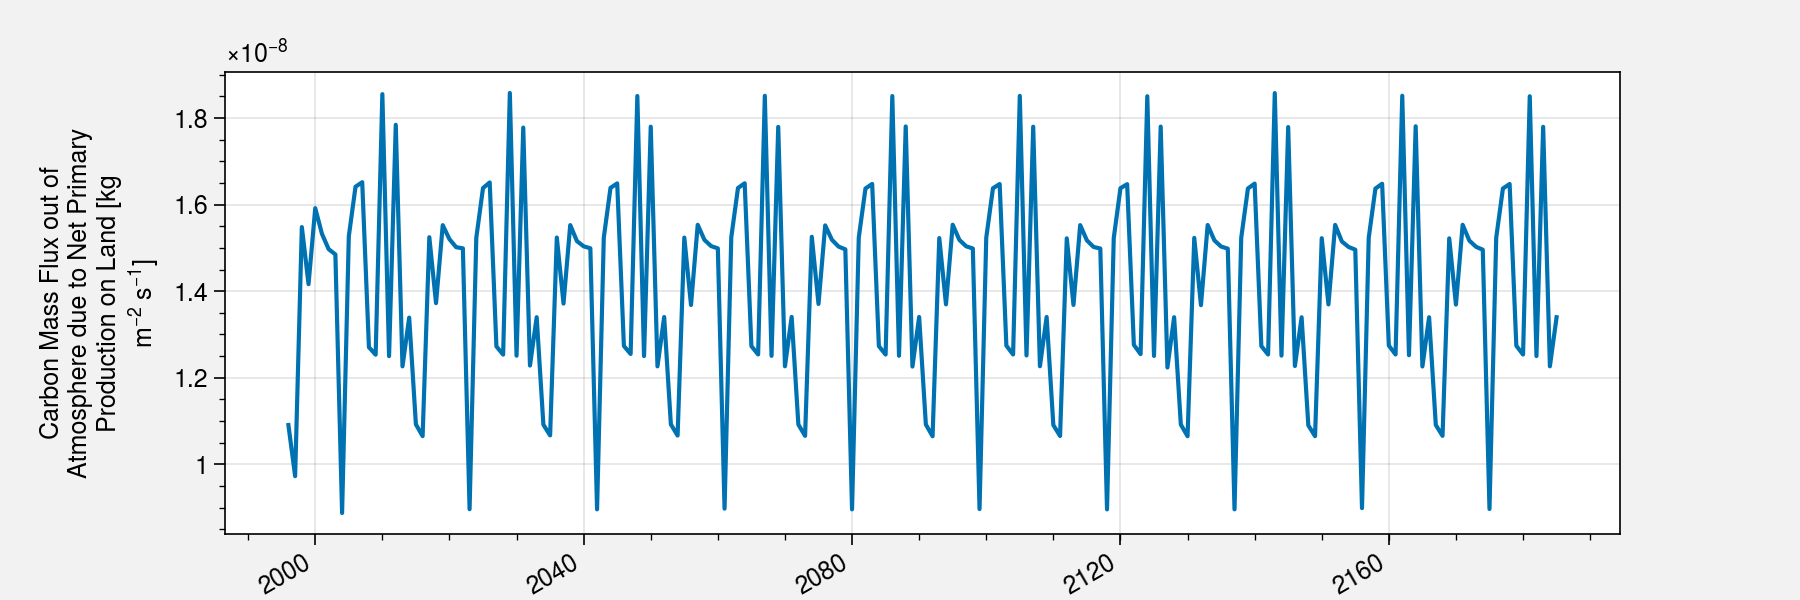

In [35]:
npp.plot(aspect=3, size=3)

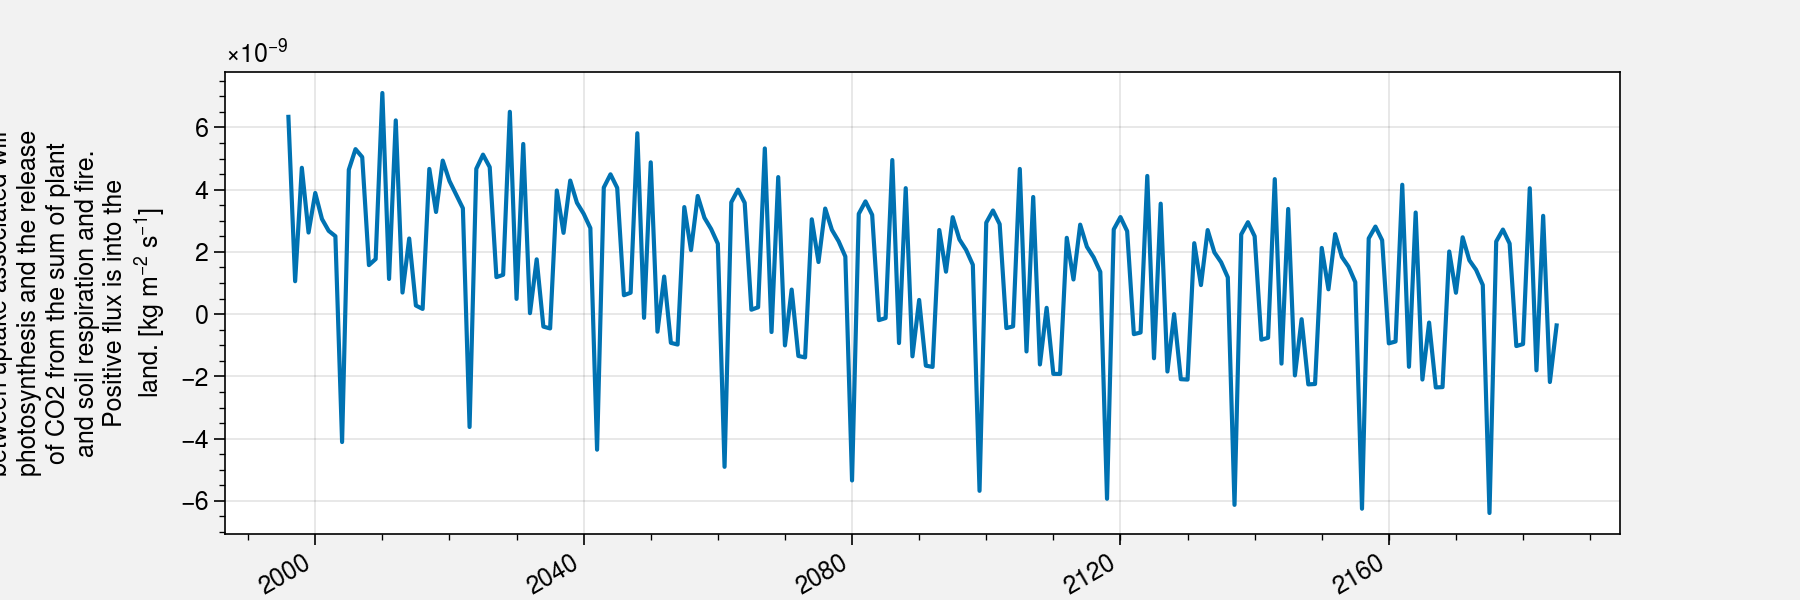

In [36]:
nep.plot(aspect=3, size=3)

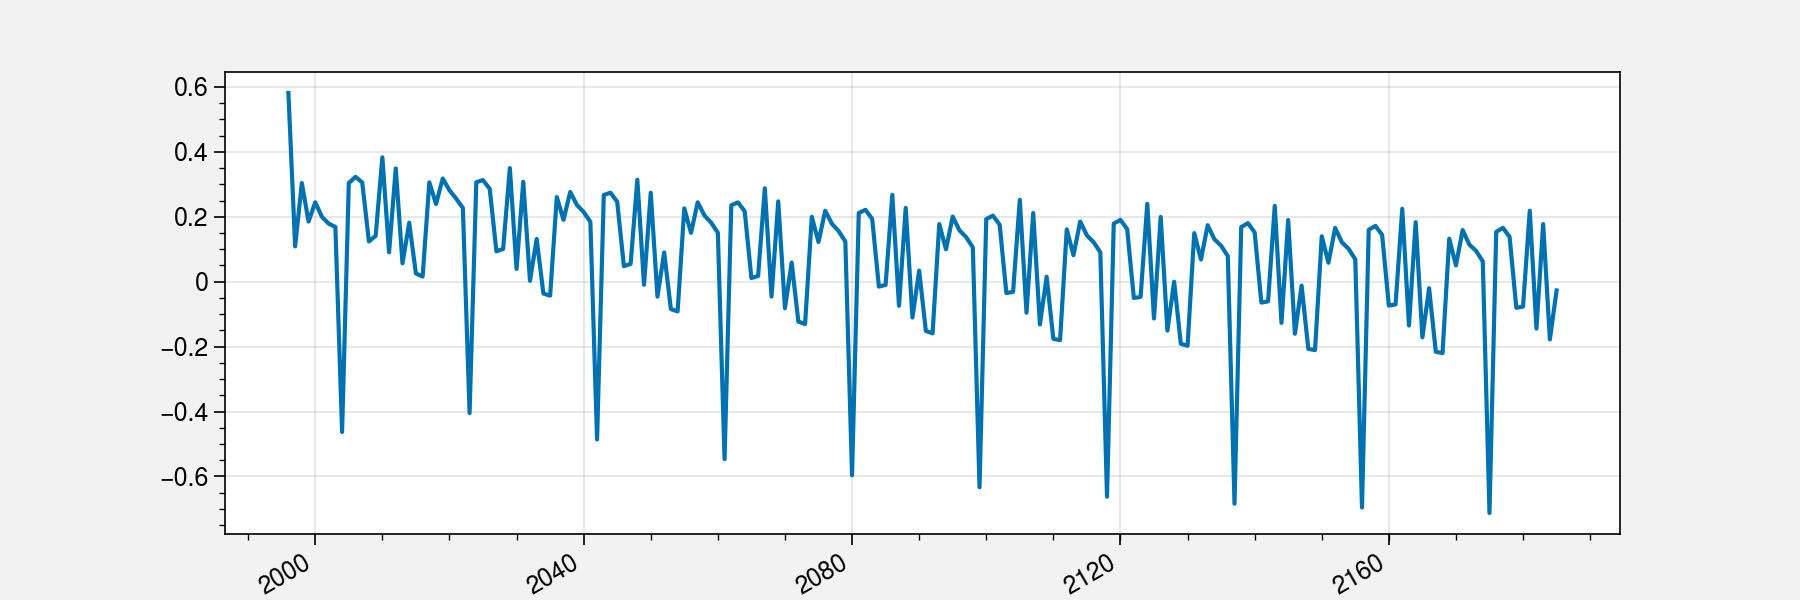

In [37]:
(nep/npp).plot(aspect=3, size=3)

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


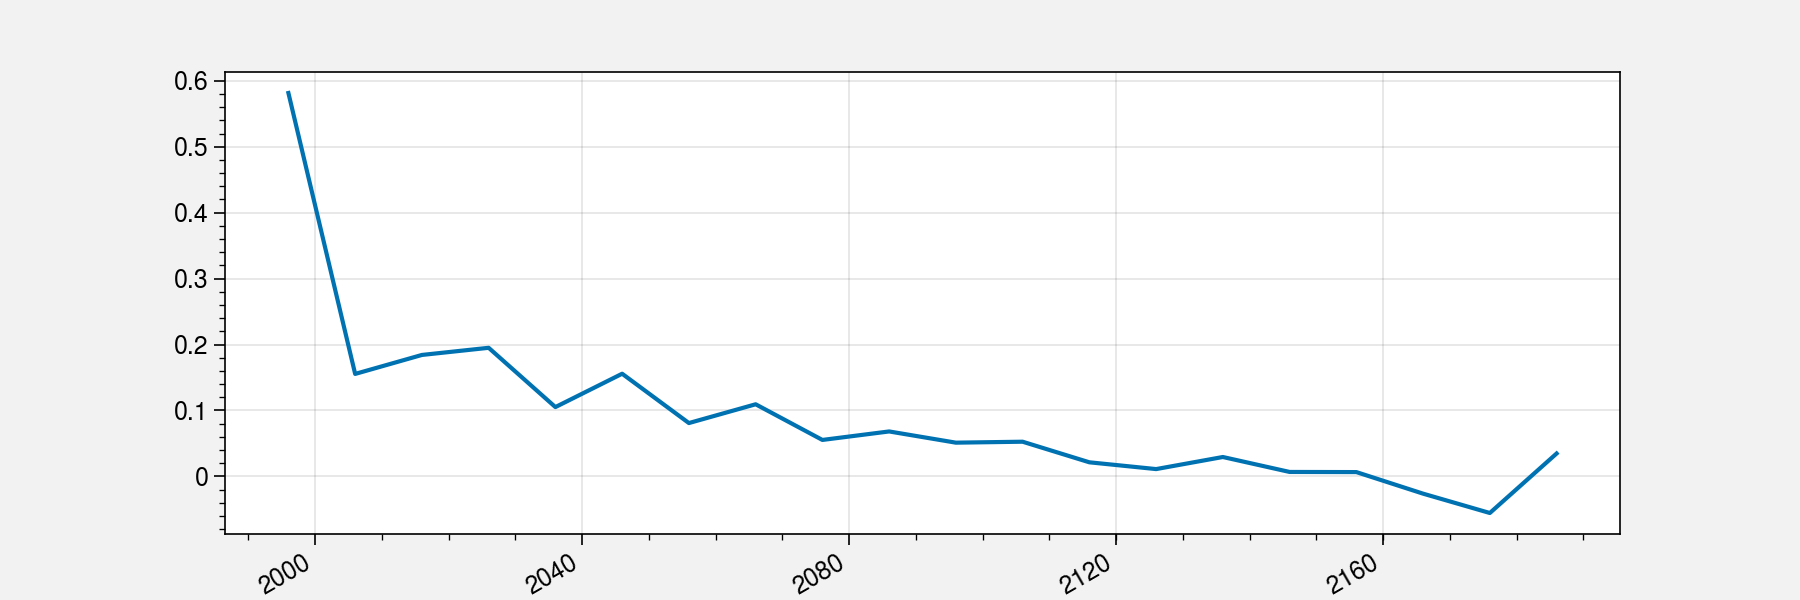

In [41]:
(nep/npp).resample(time='10Y').mean().plot(aspect=3, size=3)

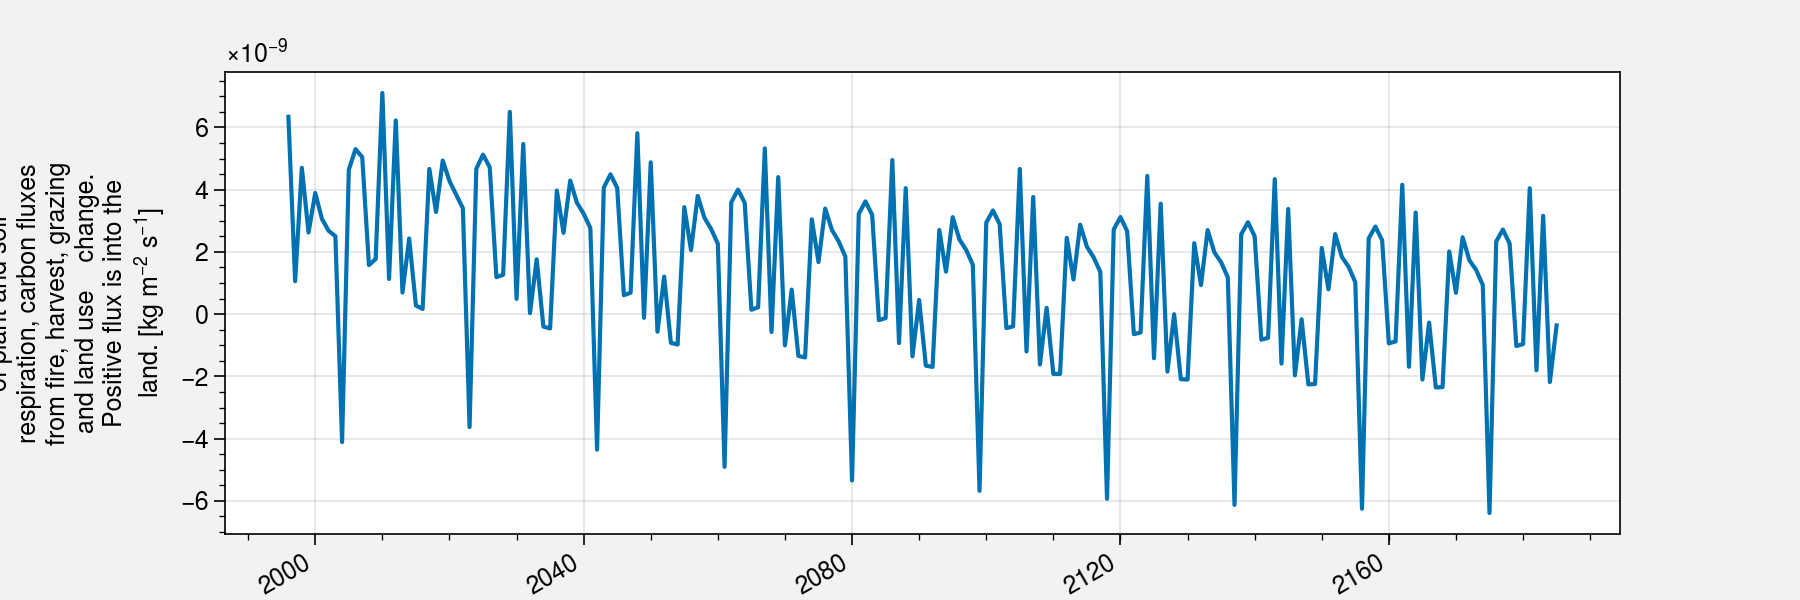

In [44]:
nbp.plot(aspect=3, size=3)

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


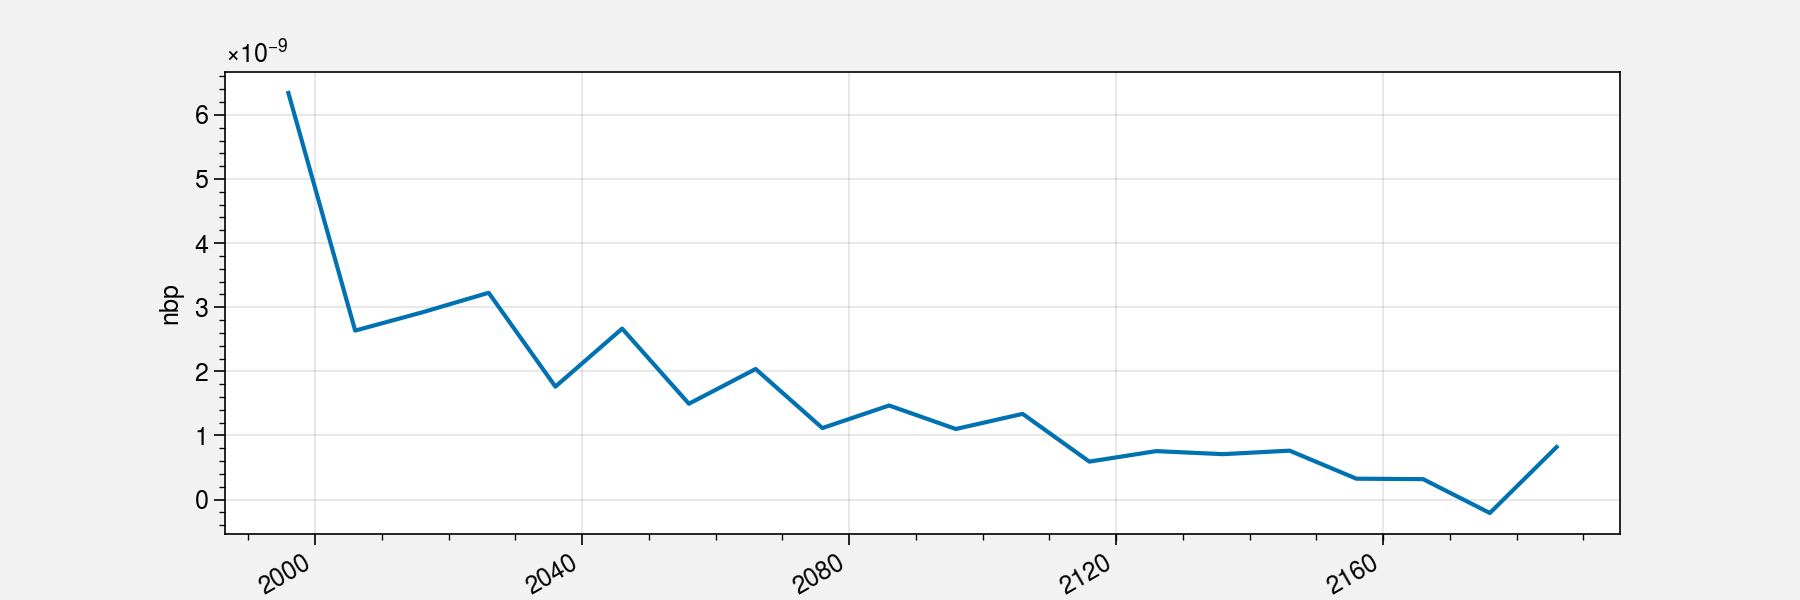

In [45]:
nbp.resample(time='10Y').mean().plot(aspect=3, size=3)

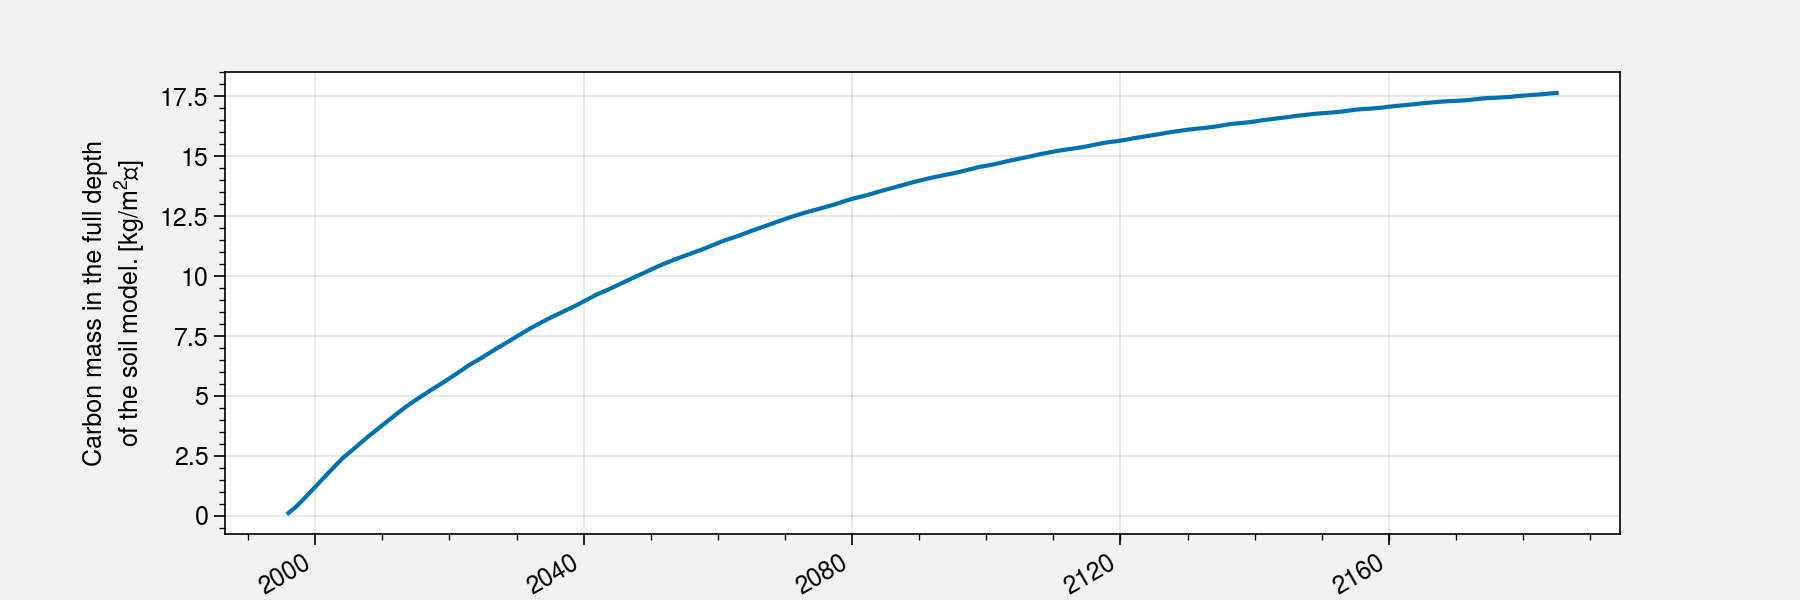

In [46]:
cSoil.plot(aspect=3, size=3)

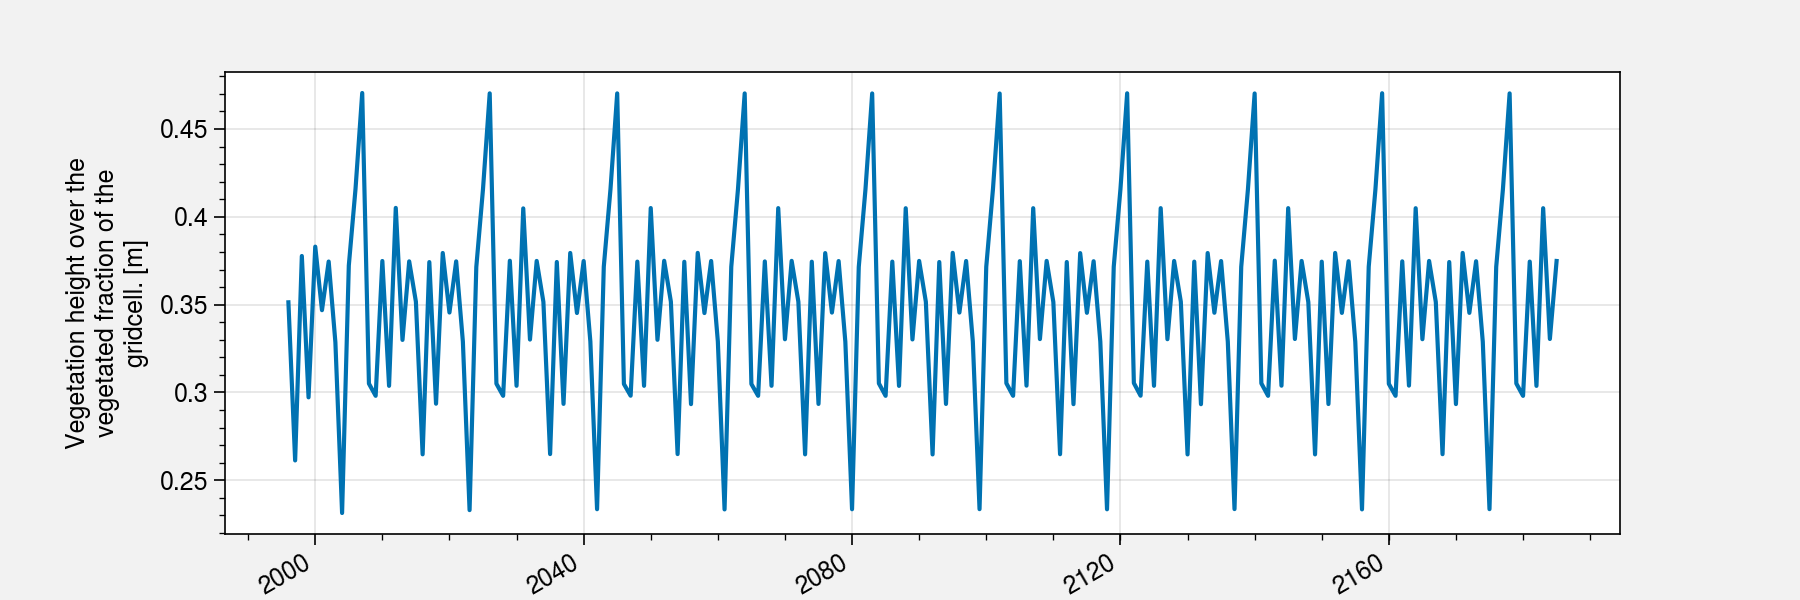

In [47]:
vegHeight.plot(aspect=3, size=3)

In [87]:
cSoil.long_name

'Carbon mass in the full depth of the soil model.'

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


Text(0.5, 0.98, 'Spinup Col de Porte (1995-2013) / metLoop = 10; spinfast = 2')

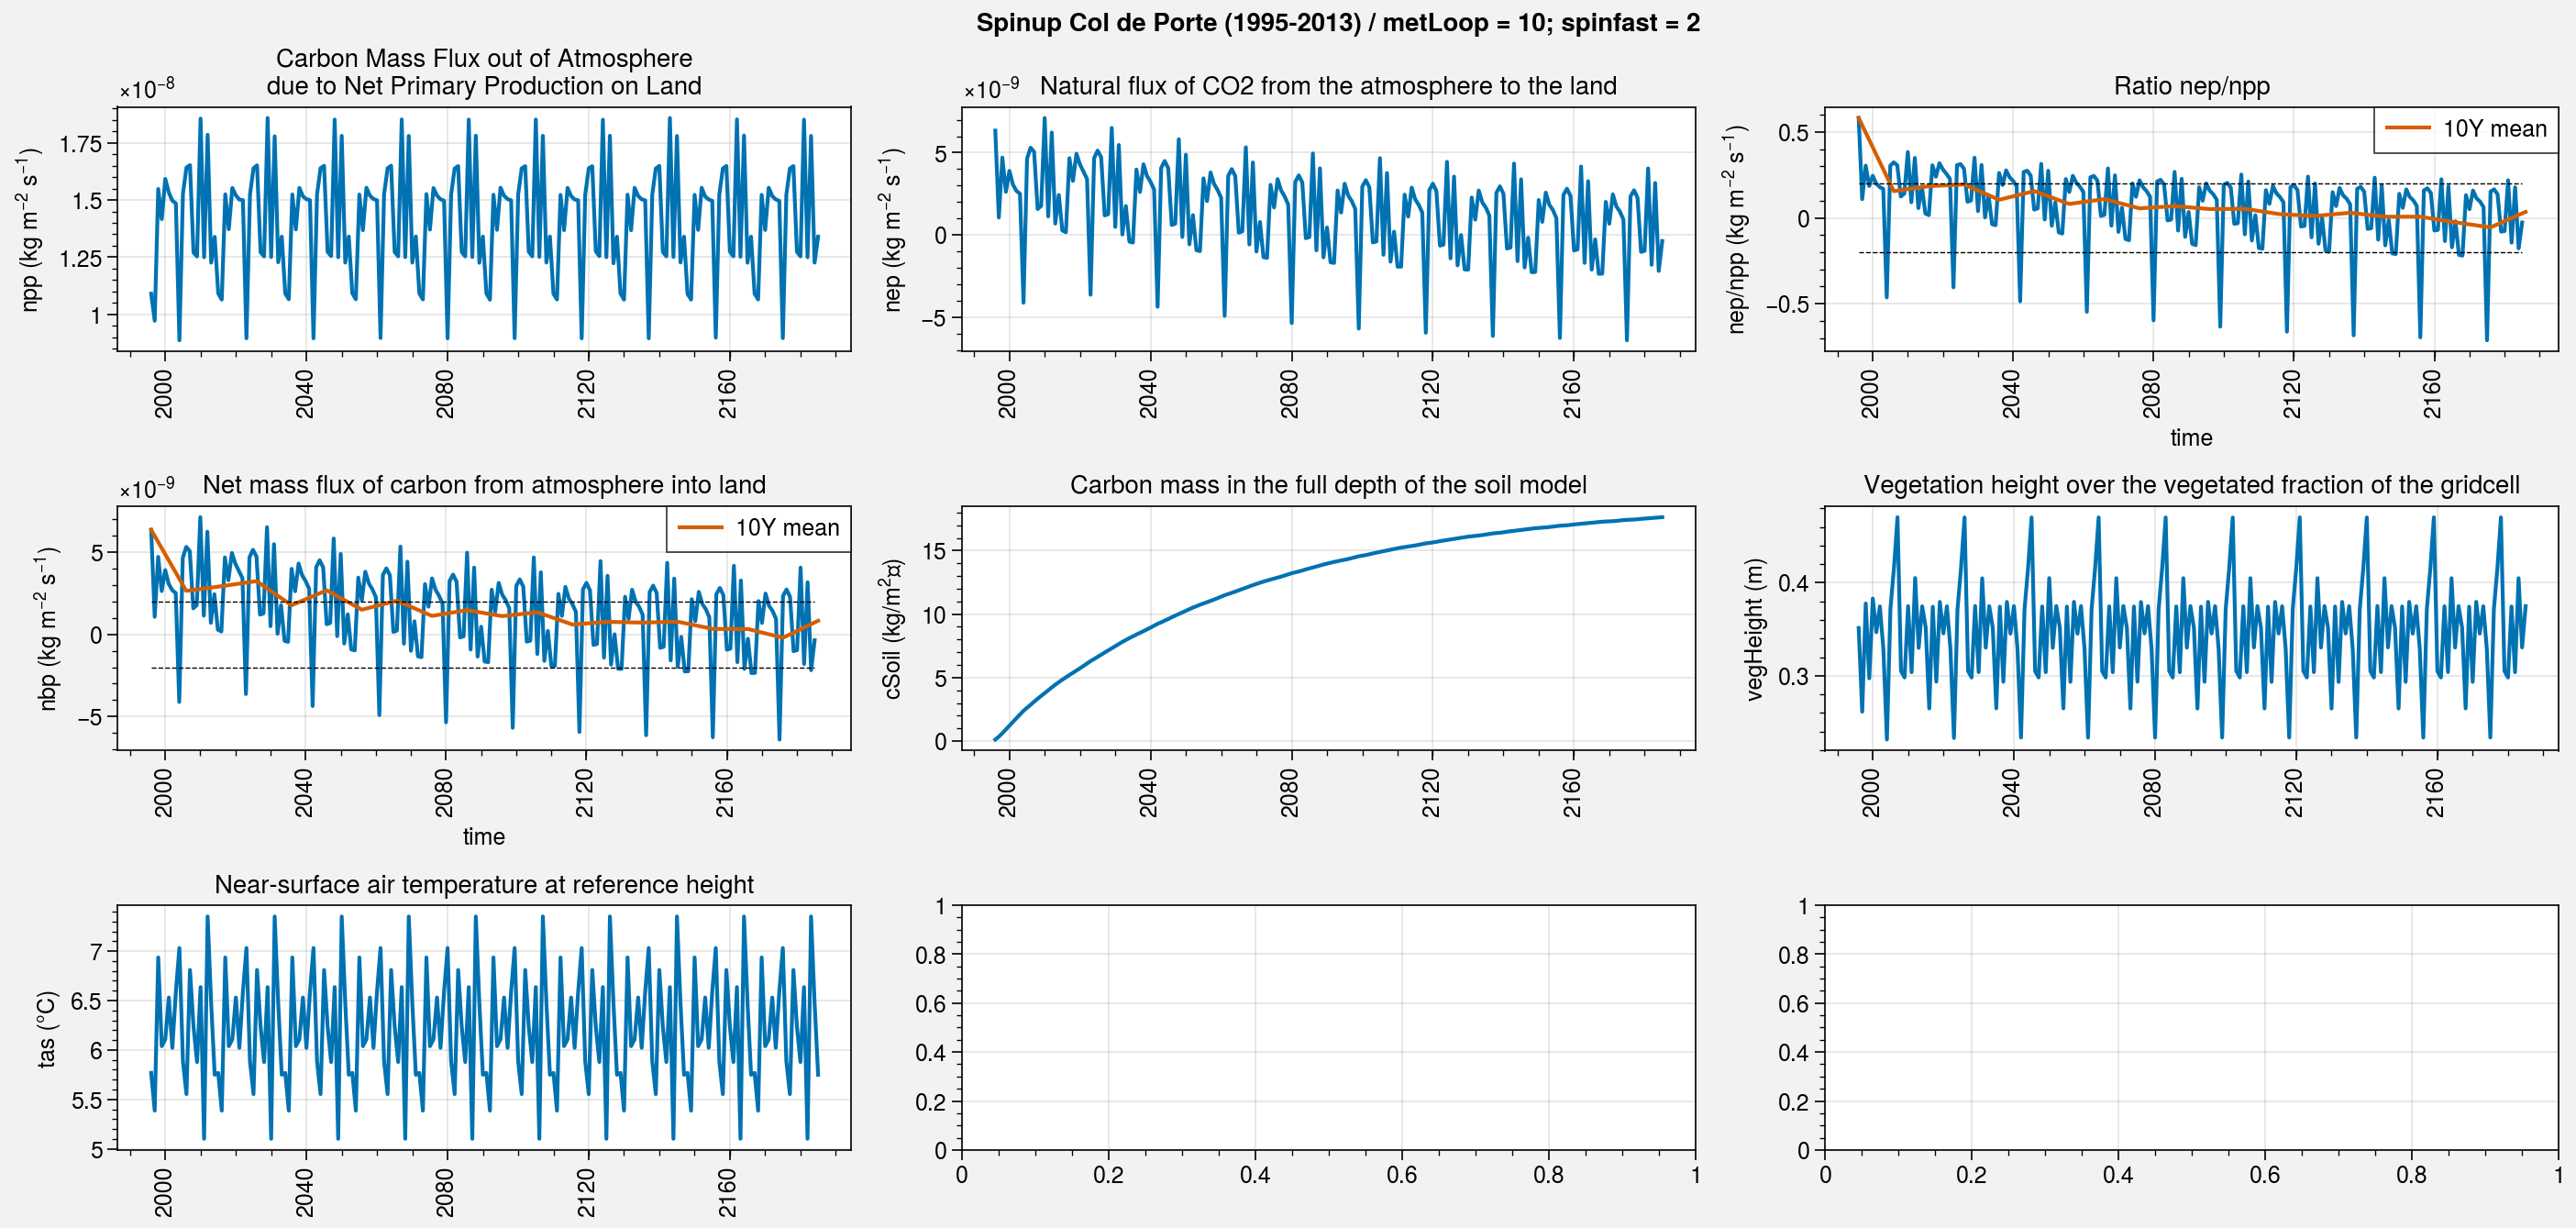

In [91]:
fig, axs = plot.subplots(ncols=3, nrows=3, aspect=3, axwidth=4, share=0)

# npp
axs[0].plot(npp)
axs[0].format(title='Carbon Mass Flux out of Atmosphere\ndue to Net Primary Production on Land', ylabel='npp ('+npp.units+')')

# nep
axs[1].plot(nep)
axs[1].format(title='Natural flux of CO2 from the atmosphere to the land', ylabel='nep ('+nep.units+')')

# nep/npp
axs[2].plot(nep/npp)
k = axs[2].plot((nep/npp).resample(time='10Y').mean(), label='10Y mean')
axs[2].plot(nep*0+0.2, color='k', lw=0.5, ls='--')
axs[2].plot(nep*0-0.2, color='k', lw=0.5, ls='--')
axs[2].format(title='Ratio nep/npp', ylabel='nep/npp ('+nep.units+')')
axs[2].legend(k)

# nbp
axs[3].plot(nbp)
axs[3].format(title='Net mass flux of carbon from atmosphere into land', ylabel='nbp ('+nbp.units+')')
k = axs[3].plot(nbp.resample(time='10Y').mean(), label='10Y mean')
axs[3].plot(nbp*0+0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].plot(nbp*0-0.2*10e-9, color='k', lw=0.5, ls='--')
axs[3].legend(k)

# cSoil
axs[4].plot(cSoil)
axs[4].format(title='Carbon mass in the full depth of the soil model', ylabel='cSoil ('+cSoil.units+')')

# vegHeight
axs[5].plot(vegHeight)
axs[5].format(title='Vegetation height over the vegetated fraction of the gridcell', ylabel='vegHeight ('+vegHeight.units+')')

# tas
axs[6].plot(tas-273.15)
axs[6].format(title=tas.long_name, ylabel='tas (°C)')

fig.suptitle('Spinup Col de Porte (1995-2013) / metLoop = 10; spinfast = 2')

## Check restart file

In [92]:
path = "/home/lalandmi/eccc/classic-develop/inputFiles/SnowMIP/FR-Cdp_spinup"

In [94]:
rsfile = xr.open_dataset(path+'/rsfile.nc')
rsfile

<xarray.Dataset>
Dimensions:            (ic: 5, icc: 12, iccp1: 13, iccp2: 14, icp1: 6, lat: 1, layer: 20, lon: 1, slope: 8, tile: 1)
Coordinates:
  * lat                (lat) float64 45.3
  * lon                (lon) float64 5.77
  * tile               (tile) int32 1
  * icp1               (icp1) int32 1 2 3 4 5 6
  * layer              (layer) int32 1 2 3 4 5 6 7 8 ... 13 14 15 16 17 18 19 20
  * ic                 (ic) int32 1 2 3 4 5
  * icc                (icc) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * iccp1              (iccp1) int32 1 2 3 4 5 6 7 8 9 10 11 12 13
  * iccp2              (iccp2) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * slope              (slope) int32 1 2 3 4 5 6 7 8
Data variables:
    ALBS               (tile, lat, lon) float64 ...
    ALIC               (tile, icp1, lat, lon) float64 ...
    ALVC               (tile, icp1, lat, lon) float64 ...
    CLAY               (tile, layer, lat, lon) float64 ...
    CMAS               (tile, ic, lat, lon) float64 ...
    Cmossmas           (tile, lat, lon) float64 ...
    DELZ               (layer) float64 ...
    DRN                (tile, lat, lon) float64 ...
    FARE               (tile, lat, lon) float64 ...
    FCAN               (tile, icp1, lat, lon) float64 ...
    GRO                (tile, lat, lon) float64 ...
    LNZ0               (tile, icp1, lat, lon) float64 ...
    ORGM               (tile, layer, lat, lon) float64 ...
    PAMN               (tile, ic, lat, lon) float64 ...
    PAMX               (tile, ic, lat, lon) float64 ...
    RCAN               (tile, lat, lon) float64 ...
    RHOS               (tile, lat, lon) float64 ...
    ROOT               (tile, ic, lat, lon) float64 ...
    SAND               (tile, layer, lat, lon) float64 ...
    SCAN               (tile, lat, lon) float64 ...
    SDEP               (tile, lat, lon) float64 ...
    SNO                (tile, lat, lon) float64 ...
    SOCI               (tile, lat, lon) float64 ...
    TBAR               (tile, layer, lat, lon) float64 ...
    TCAN               (tile, lat, lon) float64 ...
    THIC               (tile, layer, lat, lon) float64 ...
    THLQ               (tile, layer, lat, lon) float64 ...
    TPND               (tile, lat, lon) float64 ...
    TSNO               (tile, lat, lon) float64 ...
    ZPND               (tile, lat, lon) float64 ...
    bleafmas           (tile, icc, lat, lon) float64 ...
    dmoss              (tile, lat, lon) float64 ...
    fcancmx            (tile, icc, lat, lon) float64 ...
    grclarea           (lat, lon) float64 ...
    ipeatland          (tile, lat, lon) float64 ...
    lfstatus           (tile, icc, lat, lon) float64 ...
    litrmass           (tile, layer, iccp2, lat, lon) float64 ...
    litrmsmoss         (tile, lat, lon) float64 ...
    nbleafmas          (tile, icc, lat, lon) float64 ...
    ngleafmas_ns       (tile, icc, lat, lon) float64 ...
    ngleafmas_s        (tile, icc, lat, lon) float64 ...
    nh4_mass           (tile, iccp1, lat, lon) float32 ...
    nlitrmass          (tile, iccp1, lat, lon) float64 ...
    soilnmas           (tile, iccp1, lat, lon) float64 ...
    nmtest             (lat, lon) float64 ...
    no3_mass           (tile, iccp1, lat, lon) float32 ...
    soilpH             (tile, lat, lon) float32 ...
    nrootmass_ns       (tile, icc, lat, lon) float64 ...
    nrootmass_s        (tile, icc, lat, lon) float64 ...
    nstemmass_ns       (tile, icc, lat, lon) float64 ...
    nstemmass_s        (tile, icc, lat, lon) float64 ...
    pandays            (tile, icc, lat, lon) float64 ...
    slopefrac          (tile, slope, lat, lon) float64 ...
    soilcmas           (tile, layer, iccp2, lat, lon) float64 ...
    maxAnnualActLyr    (tile, lat, lon) float64 ...
    grwtheff           (tile, icc, lat, lon) float64 ...
    gleafmas_ns        (tile, icc, lat, lon) float64 ...
    gleafmas_s         (tile, icc, lat, lon) float64 ...
    stemmass_ns        (tile, icc, lat, lon) float64 ...
    stemmass_s         

In [100]:
cSoil[-1]

<xarray.DataArray 'cSoil' (lat: 1, lon: 1)>
array([[17.634813]])
Coordinates:
    time     datetime64[ns] 2185-01-03
Dimensions without coordinates: lat, lon
Attributes:
    long_name:   Carbon mass in the full depth of the soil model.
    units:       kg/m$^2$​
    nameInCode:  soilcmas_yr_g

In [101]:
rsfile.soilcmas[0, :, 8, 0, 0].sum()

<xarray.DataArray 'soilcmas' ()>
array(17.63481336)
Coordinates:
    lat      float64 45.3
    lon      float64 5.77
    tile     int32 1
    iccp2    int32 9